#**Bank Dataset**

In [ ]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the Dataset

df=pd.read_csv("/content/bank.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
#rows are 4521 and columns are 17

df.shape

(4521, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#Checking null values are present or not

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#**Exploratory Data Analysis**

<Axes: >

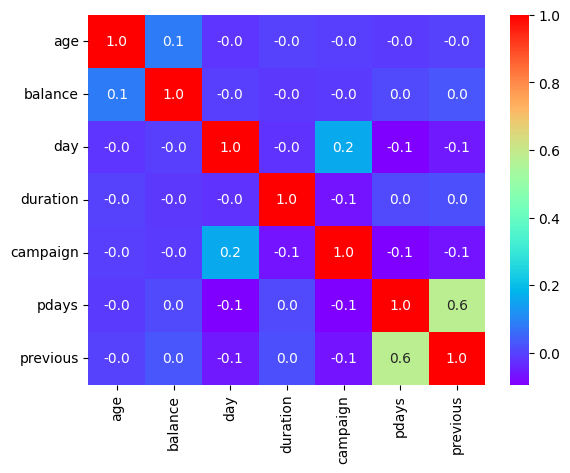

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow',fmt='.1f')

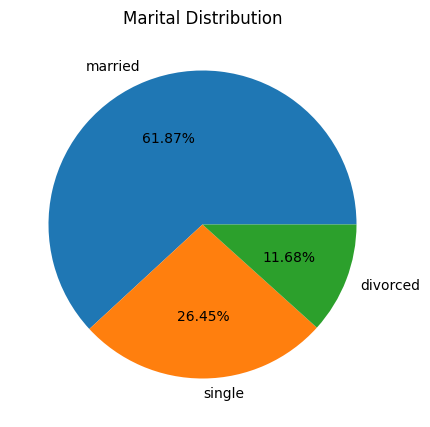

In [ ]:
marital=df['marital'].value_counts().reset_index()
plt.figure(figsize=(7,5))
plt.title('Marital Distribution')
plt.pie(marital['marital'],labels=marital['index'],autopct='%1.2f%%')
plt.show()

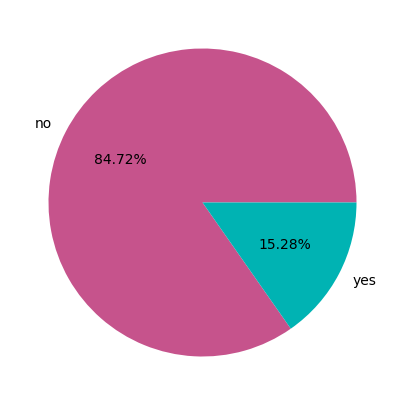

In [ ]:
loan=df['loan'].value_counts().reset_index()
plt.figure(figsize=(7,5))
color=['#c6538c','#00b3b3']
plt.pie(loan['loan'],labels=loan['index'],autopct='%1.2f%%',colors=color)
plt.show()

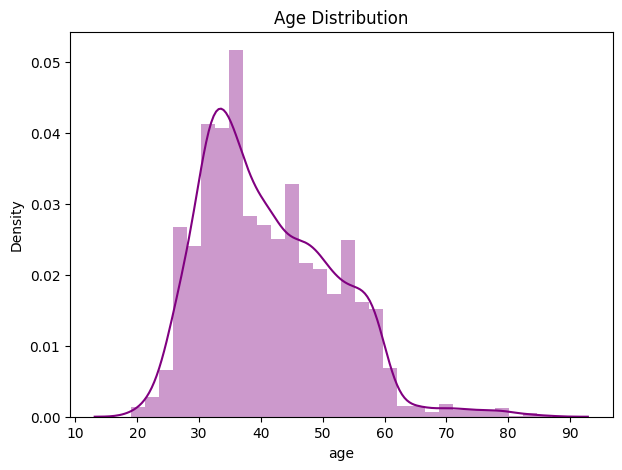

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Age Distribution')
sns.distplot(df['age'],hist=True,bins=30,color='purple')
plt.show()

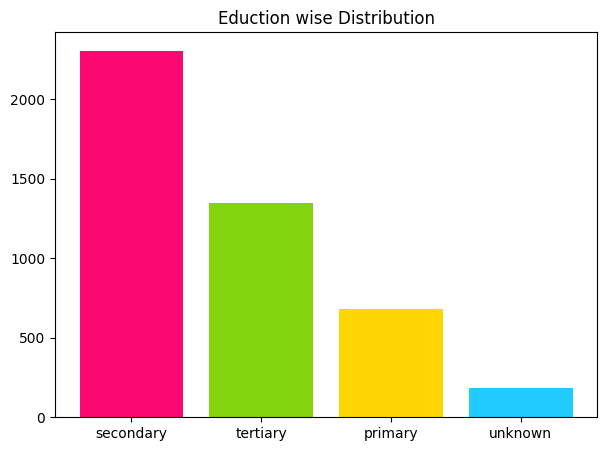

In [ ]:
educ=df['education'].value_counts().reset_index()
plt.figure(figsize=(7,5))
color=['#fc0872','#82d40f','#ffd503','#1fcbff']
plt.title('Eduction wise Distribution')
plt.bar(educ['index'],educ['education'],color=color)
plt.show()

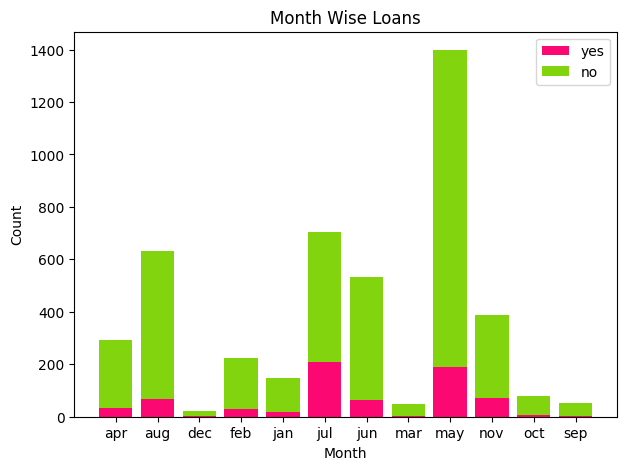

In [ ]:
mon_loan=df.groupby(['month','loan']).size().reset_index()
mon_loan.rename(columns={0:'Count'},inplace=True)
mon_loan_yes=mon_loan[mon_loan['loan']=='yes']
mon_loan_no=mon_loan[mon_loan['loan']=='no']
plt.figure(figsize=(7,5))
plt.title('Month Wise Loans')
plt.xlabel('Month')
plt.ylabel('Count')
plt.bar(mon_loan_yes['month'],mon_loan_yes['Count'],label='yes',color='#fc0872')
plt.bar(mon_loan_no['month'],mon_loan_no['Count'],bottom=mon_loan_yes['Count'],label='no',color='#82d40f')
plt.legend()
plt.show()

In [ ]:
df.drop(['pdays','previous','poutcome','y'],axis=1,inplace=True)

#**PreProcessing**



In [ ]:
encoder=LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['default']=encoder.fit_transform(df['default'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['contact']=encoder.fit_transform(df['contact'])
df['month']=encoder.fit_transform(df['month'])

In [ ]:
#Assigning Variables

x=df.drop('default',axis=1)
y=df['default']

In [ ]:
#splitting dataset into train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [ ]:
x_train.shape,x_test.shape

((3616, 12), (905, 12))

In [ ]:
y_train.shape,y_test.shape

((3616,), (905,))

#**Model Building**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9602209944751381


In [ ]:
# Checking Overfitting and Underfitting

x_pred=model.predict(x_train)
print("Accuracy Score:",accuracy_score(y_train,x_pred))

Accuracy Score: 1.0


**There is no Overfitting and Underfitting**

<Axes: >

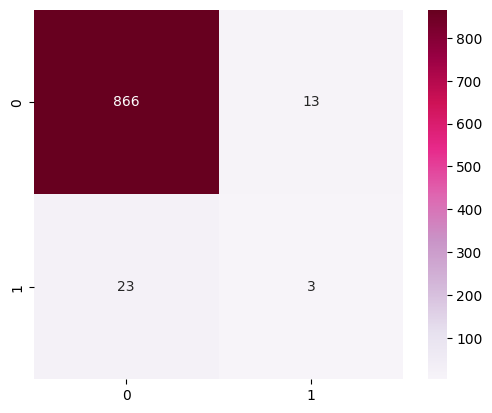

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,square=True,fmt='d',cmap='PuRd')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       879
           1       0.19      0.12      0.14        26

    accuracy                           0.96       905
   macro avg       0.58      0.55      0.56       905
weighted avg       0.95      0.96      0.96       905



##**Result :** DecisionTreeClassifier Model performing really well, scoring 1.0 on the training data and 96% on the test data. This means it's good at making accurate predictions